C:\Users\BOLLA POOJA\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\BOLLA POOJA\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


K-Means - Silhouette Score: 0.6569234398199433 Davies-Bouldin Index: 0.46137036230952966
Hierarchical Clustering - Silhouette Score: 0.6565591503146831 Davies-Bouldin Index: 0.4599373518250249
DBSCAN - Silhouette Score: 0.5942168218296967 Davies-Bouldin Index: 3.325072730663952


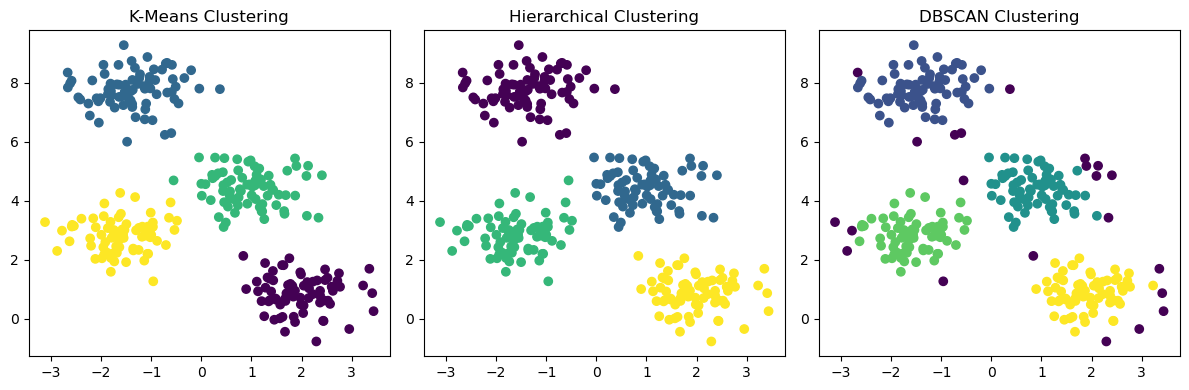

In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.preprocessing import StandardScaler

# Generate sample data (you can replace this with your own dataset)
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Preprocess the data (scaling for better performance of some algorithms)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize clustering algorithms
kmeans = KMeans(n_clusters=4, random_state=42)
hierarchical = AgglomerativeClustering(n_clusters=4)
dbscan = DBSCAN(eps=0.3, min_samples=10)

# Perform clustering with each algorithm
kmeans_labels = kmeans.fit_predict(X_scaled)
hierarchical_labels = hierarchical.fit_predict(X_scaled)
dbscan_labels = dbscan.fit_predict(X_scaled)

# Evaluate clustering results using silhouette score and Davies–Bouldin index
kmeans_silhouette = silhouette_score(X_scaled, kmeans_labels)
kmeans_db = davies_bouldin_score(X_scaled, kmeans_labels)
hierarchical_silhouette = silhouette_score(X_scaled, hierarchical_labels)
hierarchical_db = davies_bouldin_score(X_scaled, hierarchical_labels)
dbscan_silhouette = silhouette_score(X_scaled, dbscan_labels)
dbscan_db = davies_bouldin_score(X_scaled, dbscan_labels)

print("K-Means - Silhouette Score:", kmeans_silhouette, "Davies-Bouldin Index:", kmeans_db)
print("Hierarchical Clustering - Silhouette Score:", hierarchical_silhouette, "Davies-Bouldin Index:", hierarchical_db)
print("DBSCAN - Silhouette Score:", dbscan_silhouette, "Davies-Bouldin Index:", dbscan_db)

# Visualize the clustering results
plt.figure(figsize=(12, 4))

plt.subplot(131)
plt.scatter(X[:, 0], X[:, 1], c=kmeans_labels, cmap='viridis')
plt.title('K-Means Clustering')

plt.subplot(132)
plt.scatter(X[:, 0], X[:, 1], c=hierarchical_labels, cmap='viridis')
plt.title('Hierarchical Clustering')

plt.subplot(133)
plt.scatter(X[:, 0], X[:, 1], c=dbscan_labels, cmap='viridis')
plt.title('DBSCAN Clustering')

plt.tight_layout()
plt.show()